<a href="https://colab.research.google.com/github/Znsored/COEN-396B/blob/main/static_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **0. Loading the Data from CSV file**



In [1]:
from google.colab import files
uploaded = files.upload()

Saving assign1_wastedata1.csv to assign1_wastedata1.csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['assign1_wastedata1.csv']))

## **1. Exploratory Data Analysis**

In [3]:
df.shape

(237, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data Year  237 non-null    int64  
 1   Date       237 non-null    object 
 2   Building   237 non-null    object 
 3   Stream     237 non-null    object 
 4   Weight     237 non-null    float64
 5   Notes      153 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.2+ KB


In [5]:
df.head()

,Data Year,Date,Building,Stream,Weight,Notes
0,2018,2/8/2019,Swig,Landfill,0.3,food wrappers
1,2018,2/8/2019,Swig,Compost in Landfill,0.5,food containers
2,2018,2/8/2019,Swig,Recycling in Landfill,0.1,"mail, paper"
3,2018,2/8/2019,Swig,Food Waste in Landfill,0.1,"chicken nuggets, bread"
4,2018,2/8/2019,Swig,Food Waste in Landfill,5.7,fruits and veggies


In [6]:
df.isnull().sum()

Data Year     0
Date          0
Building      0
Stream        0
Weight        0
Notes        84
dtype: int64

In [7]:
df.groupby('Building')['Weight'].sum()

Building
Campisi     36.7
Dunne       34.1
Graham     648.0
McWalsh     66.9
Swig       380.1
Name: Weight, dtype: float64

In [8]:
df.groupby(['Building','Stream'])['Weight'].sum()

Building  Stream                 
Campisi   Compost                      2.6
          Compost in Landfill          1.0
          Compost in Recycling         0.8
          Food Waste in Compost        7.1
          Food Waste in Landfill       2.7
          Landfill                     2.7
          Landfill in Recycling        0.5
          Recycling                   15.0
          Recycling in Compost         2.4
          Recycling in Landfill        1.9
Dunne     Compost                      2.9
          Compost in Landfill          3.3
          Compost in Recycling         3.4
          Food Waste in Compost        6.0
          Food Waste in Landfill       2.4
          Food Waste in Recycling      0.5
          Landfill                     2.8
          Landfill in Recycling        1.8
          Recycling                    9.9
          Recycling in Landfill        1.1
Graham    Compost                    117.0
          Compost in Landfill         41.4
          Compost in

In [9]:
df.drop(['Date','Notes'],axis=1)

,Data Year,Building,Stream,Weight
0,2018,Swig,Landfill,0.3
1,2018,Swig,Compost in Landfill,0.5
2,2018,Swig,Recycling in Landfill,0.1
3,2018,Swig,Food Waste in Landfill,0.1
4,2018,Swig,Food Waste in Landfill,5.7
...,...,...,...,...
232,2020,Graham,Recycling in Compost,2.1
233,2020,Graham,Food Waste in Landfill,24.3
234,2020,Graham,Landfill,14.8
235,2020,Graham,Compost in Landfill,10.8


In [10]:
df.groupby(['Stream'])['Weight'].sum()

Stream
Compost                    198.5
Compost in Landfill         70.0
Compost in Recycling        40.1
Food Waste in Compost      239.9
Food Waste in Landfill     159.8
Food Waste in Recycling     21.2
Landfill                   102.7
Landfill in Compost         29.9
Landfill in Recycling       26.1
Recycling                  191.3
Recycling in Compost        34.3
Recycling in Landfill       50.0
Reusables in Landfill        2.0
Name: Weight, dtype: float64

## **2. Feature Engineering**

In [11]:
df['Trash Sorted'] = df['Stream'].apply(lambda x: 'Yes' if ' in ' not in str(x) else 'No')

In [12]:
df.loc[df['Stream']=='Food Waste in Compost','Trash Sorted'] = 'Yes'

In [13]:
df['True Category'] = df['Stream'].apply(lambda x: "Compost" if str(x).startswith("Food") else x.split(" in")[0].strip() if ' in ' in str(x) else x)

df['Category'] = df['Stream'].apply(lambda x: x.split(" in")[-1].strip() if ' in ' in str(x) else x)

In [14]:
df.head()

,Data Year,Date,Building,Stream,Weight,Notes,Trash Sorted,True Category,Category
0,2018,2/8/2019,Swig,Landfill,0.3,food wrappers,Yes,Landfill,Landfill
1,2018,2/8/2019,Swig,Compost in Landfill,0.5,food containers,No,Compost,Landfill
2,2018,2/8/2019,Swig,Recycling in Landfill,0.1,"mail, paper",No,Recycling,Landfill
3,2018,2/8/2019,Swig,Food Waste in Landfill,0.1,"chicken nuggets, bread",No,Compost,Landfill
4,2018,2/8/2019,Swig,Food Waste in Landfill,5.7,fruits and veggies,No,Compost,Landfill


In [15]:
df.groupby(['True Category'])['Weight'].sum()

True Category
Compost      729.5
Landfill     158.7
Recycling    275.6
Reusables      2.0
Name: Weight, dtype: float64

In [16]:
df.loc[df['Category']==df['True Category'],'Trash Sorted'] = 'Yes'
df.loc[df['Category']!=df['True Category'],'Trash Sorted'] = 'No'

In [17]:
df.drop(df[(df['True Category'] == "Reusables")].index, inplace=True)

In [18]:
df.groupby(['Trash Sorted'])['Weight'].sum()

Trash Sorted
No     431.4
Yes    732.4
Name: Weight, dtype: float64

In [20]:
df.groupby(['True Category','Trash Sorted'])['Weight'].sum().unstack(fill_value=0)

Trash Sorted,No,Yes
True Category,,
Compost,291.1,438.4
Landfill,56.0,102.7
Recycling,84.3,191.3


### 3. Visualizing Data

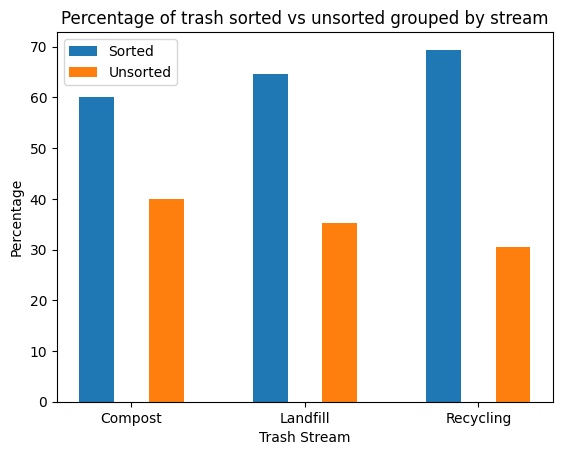

In [34]:
import numpy as np
import matplotlib.pyplot as plt

streams = list(dict(df.groupby('True Category')['Weight'].sum()).keys())
df2 = df.loc[df['Trash Sorted'] == 'Yes']
sorted = list(dict(df2.groupby(['True Category'])['Weight'].sum()).values())
df2 = df.loc[df['Trash Sorted'] == 'No']
unsorted = list(dict(df2.groupby(['True Category'])['Weight'].sum()).values())
p_df = list(sorted)
p_df2 = list(unsorted)
for i in range(len(sorted)):
  p_df[i] = (100*sorted[i])/(sorted[i]+unsorted[i])
  p_df2[i] = (100*unsorted[i])/(sorted[i]+unsorted[i])
  
X_axis = np.arange(len(streams))
  
plt.bar(X_axis - 0.2, p_df, 0.2, label = 'Sorted')
plt.bar(X_axis + 0.2, p_df2, 0.2, label = 'Unsorted')
  
plt.xticks(X_axis, streams)
plt.xlabel("Trash Stream")
plt.ylabel("Percentage")
plt.title("Percentage of trash sorted vs unsorted grouped by stream")
plt.legend()
plt.show()

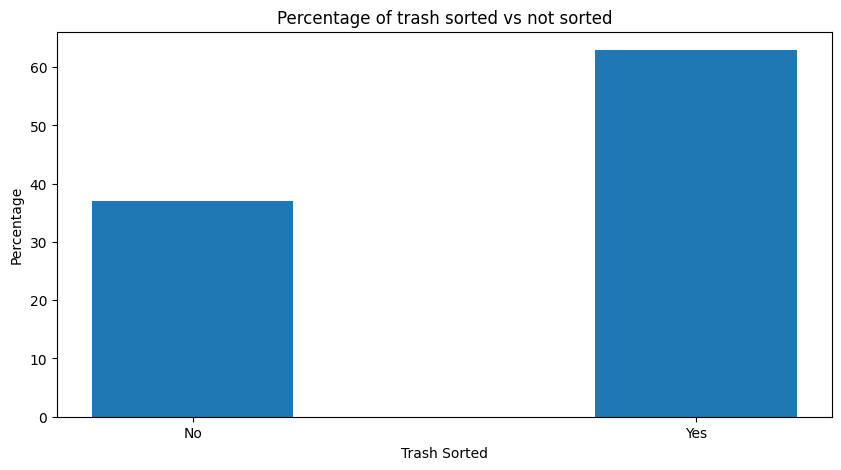

In [33]:
data = dict(df.groupby(['Trash Sorted'])['Weight'].sum())

courses = list(data.keys())
values = list(data.values())

sum = df['Weight'].sum()
for i in range(len(courses)):
  values[i] = 100*values[i]/sum
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Trash Sorted")
plt.ylabel("Percentage")
plt.title("Percentage of trash sorted vs not sorted")
plt.show()


##**4. Values Grouped by Building for each Stream**

In [28]:
df[df['True Category']=='Compost'].groupby(['Building','Trash Sorted'])['Weight'].sum()

Building  Trash Sorted
Campisi   No                4.5
          Yes               9.7
Dunne     No                9.6
          Yes               8.9
Graham    No              158.7
          Yes             255.8
McWalsh   No               18.4
          Yes              26.8
Swig      No               99.9
          Yes             137.2
Name: Weight, dtype: float64

In [31]:
df[df['True Category']=='Landfill'].groupby(['Building','Trash Sorted'])['Weight'].sum()

Building  Trash Sorted
Campisi   No               0.5
          Yes              2.7
Dunne     No               1.8
          Yes              2.8
Graham    No              37.1
          Yes             63.7
McWalsh   No               1.5
          Yes              4.0
Swig      No              15.1
          Yes             29.5
Name: Weight, dtype: float64

In [32]:
df[df['True Category']=='Recycling'].groupby(['Building','Trash Sorted'])['Weight'].sum()

Building  Trash Sorted
Campisi   No               4.3
          Yes             15.0
Dunne     No               1.1
          Yes              9.9
Graham    No              48.2
          Yes             84.5
McWalsh   No               5.2
          Yes             11.0
Swig      No              25.5
          Yes             70.9
Name: Weight, dtype: float64